<a href="https://colab.research.google.com/github/ftcelepcikay/CS221-project/blob/main/Code/FTC_AUC_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import string
import sklearn
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import seaborn as sns

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble,calibration

#from sklearn.cross_validation import KFold
#from sklearn.cross_validation import train_test_split

#import pandas, numpy, textblob, string
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/CS221/Results/

 BERT.csv
 BERT_keep_prob_0.55_BATCH_SIZE_32_epoch_8.0_acc_0.757.csv
 day_of_week.pdf
 LR.csv
 METADATA-RESULT.xlsx
 model2.csv
 model3.csv
 model5_cnnnew.csv
 model_gbm.csv
 NB.csv
'Review Ratings_CDF.pdf'
 user_id_max_review_a_day.pdf
 word_count_CDF.pdf


In [ ]:
NB = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/NB.csv')
BERT = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/BERT_keep_prob_0.55_BATCH_SIZE_32_epoch_8.0_acc_0.757.csv')
NN = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/model2.csv')
LSTM = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/model3.csv')
LSTM_CNN = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/model5_cnnnew.csv')
GBM = pd.read_csv(r'/content/drive/MyDrive/CS221/Results/model_gbm.csv')

In [ ]:
NB

,Unnamed: 0,prob,predictions,labels
0,0,0.715514,1,1
1,1,0.585492,1,1
2,2,0.321098,0,1
3,3,0.792183,1,1
4,4,0.752995,1,1
...,...,...,...,...
9995,9995,0.052902,0,0
9996,9996,0.160620,0,0
9997,9997,0.500216,1,0
9998,9998,0.648268,1,0


In [ ]:
NN

,Unnamed: 0,prob,labels,predictions,accuracy
0,0,0.552460,1,1,1
1,1,0.569086,1,1,1
2,2,0.757054,1,1,1
3,3,1.046670,1,1,1
4,4,0.438635,1,0,0
...,...,...,...,...,...
9995,9995,0.145496,0,0,1
9996,9996,0.059134,0,0,1
9997,9997,0.233686,0,0,1
9998,9998,0.766194,0,1,0


In [ ]:
from sklearn import metrics
NB_acc = metrics.accuracy_score(NB.labels , NB.predictions)
print("NB Accuracy:", NB_acc)
NB_recall = metrics.recall_score(NB.labels , NB.predictions)
print("NB recall:", NB_recall)
NB_precision = metrics.precision_score(NB.labels , NB.predictions)
print("NB precision:", NB_precision)
NB_fpr, NB_tpr, NB_thresholds = metrics.roc_curve(NB.labels , NB.prob)
NB_auc = metrics.roc_auc_score(NB.labels , NB.prob)
print("NB Auc ROC is ",NB_auc)
NB_precision, NB_recall, NB_thresholds = metrics.precision_recall_curve(NB.labels , NB.prob)
NB_auc = metrics.auc(NB_recall, NB_precision)
print("NB Auc PRC is ",NB_auc)
NB_f1 = metrics.f1_score(NB.labels, NB.predictions)
print("NB F1 score is",NB_f1)
print("NB Log loss is ",metrics.log_loss(NB.labels , NB.prob))

NB Accuracy: 0.6544
NB recall: 0.7368
NB precision: 0.632554945054945
NB Auc ROC is  0.7080433199999999
NB Auc PRC is  0.6695996516929208
NB F1 score is 0.680709534368071
NB Log loss is  0.6241664904935046


In [ ]:
NN_acc = metrics.accuracy_score(NN.labels , NN.predictions)
print("NN Accuracy:", NN_acc)
NN_fpr, NN_tpr, NN_thresholds = metrics.roc_curve(NN.labels , NN.prob)
NN_auc = metrics.roc_auc_score(NN.labels , NN.prob)
print("NN Auc ROC is ",NN_auc)
NN_precision, NN_recall, NN_thresholds = metrics.precision_recall_curve(NN.labels , NN.prob)
NN_auc = metrics.auc(NN_recall, NN_precision)
print("NN Auc PRC is ",NN_auc)
NN_f1 = metrics.f1_score(NN.labels, NN.predictions)
print("NN F1 score is",NN_f1)
print("NN Log loss is ",metrics.log_loss(NN.labels , NN.prob))

NN Accuracy: 0.636
NN Auc ROC is  0.68496004
NN Auc PRC is  0.6488923527201023
NN F1 score is 0.6463272444617177
NN Log loss is  1.1623993351687225


In [ ]:
LSTM_acc = metrics.accuracy_score(LSTM.labels , LSTM.predictions)
print("LSTM Accuracy:", LSTM_acc)
LSTM_fpr, LSTM_tpr, LSTM_thresholds = metrics.roc_curve(LSTM.labels , LSTM.prob)
LSTM_auc = metrics.roc_auc_score(LSTM.labels , LSTM.prob)
print("LSTM Auc ROC is ",LSTM_auc)
LSTM_precision, LSTM_recall, LSTM_thresholds = metrics.precision_recall_curve(LSTM.labels , LSTM.prob)
LSTM_auc = metrics.auc(LSTM_recall, LSTM_precision)
print("LSTM Auc PRC is ",LSTM_auc)
LSTM_f1 = metrics.f1_score(LSTM.labels, LSTM.predictions)
print("LSTM F1 score is",LSTM_f1)
print("LSTM Log loss is ",metrics.log_loss(LSTM.labels , LSTM.prob))

LSTM Accuracy: 0.6218
LSTM Auc ROC is  0.66459962
LSTM Auc PRC is  0.6368575798188438
LSTM F1 score is 0.6323157690064165
LSTM Log loss is  0.7020484822797686


In [ ]:
LSTM_CNN_acc = metrics.accuracy_score(LSTM_CNN.labels , LSTM_CNN.predictions)
print("LSTM_CNN Accuracy:", LSTM_CNN_acc)
LSTM_CNN_fpr, LSTM_CNN_tpr, LSTM_CNN_thresholds = metrics.roc_curve(LSTM_CNN.labels , LSTM_CNN.prob)
LSTM_CNN_auc = metrics.roc_auc_score(LSTM_CNN.labels , LSTM_CNN.prob)
print("LSTM_CNN Auc ROC is ",LSTM_CNN_auc)
LSTM_CNN_precision, LSTM_CNN_recall, LSTM_CNN_thresholds = metrics.precision_recall_curve(LSTM_CNN.labels , LSTM_CNN.prob)
LSTM_CNN_auc = metrics.auc(LSTM_CNN_recall, LSTM_CNN_precision)
print("LSTM_CNN Auc PRC is ",LSTM_CNN_auc)
LSTM_CNN_f1 = metrics.f1_score(LSTM_CNN.labels, LSTM_CNN.predictions)
print("LSTM_CNN F1 score is",LSTM_CNN_f1)
print("LSTM_CNN Log loss is ",metrics.log_loss(LSTM_CNN.labels , LSTM_CNN.prob))

LSTM_CNN Accuracy: 0.6463
LSTM_CNN Auc ROC is  0.6977446599999999
LSTM_CNN Auc PRC is  0.6583741726676595
LSTM_CNN F1 score is 0.6815521743044927
LSTM_CNN Log loss is  0.6290140744028125


In [ ]:
GBM_acc = metrics.accuracy_score(GBM.labels , GBM.predictions)
print("GBM Accuracy:", GBM_acc)
GBM_recall = metrics.recall_score(GBM.labels , GBM.predictions)
print("GBM recall:", GBM_recall)
GBM_precision = metrics.precision_score(GBM.labels , GBM.predictions)
print("GBM precision:", GBM_precision)
GBM_fpr, GBM_tpr, GBM_thresholds = metrics.roc_curve(GBM.labels , GBM.prob)
GBM_auc = metrics.roc_auc_score(GBM.labels , GBM.prob)
print("GBM Auc ROC is ",GBM_auc)
GBM_precision, GBM_recall, GBM_thresholds = metrics.precision_recall_curve(GBM.labels , GBM.prob)
GBM_auc = metrics.auc(GBM_recall, GBM_precision)
print("GBM Auc PRC is ",GBM_auc)
GBM_f1 = metrics.f1_score(GBM.labels, GBM.predictions)
print("GBM F1 score is",GBM_f1)
print("GBM Log loss is ",metrics.log_loss(GBM.labels , GBM.prob))

GBM Accuracy: 0.6695
GBM recall: 0.7818
GBM precision: 0.6384125428711416
GBM Auc ROC is  0.7376843200000001
GBM Auc PRC is  0.7234168510336101
GBM F1 score is 0.7028679313134946
GBM Log loss is  0.6036262540703934


In [ ]:
BERT_acc = metrics.accuracy_score(BERT.labels , BERT.predictions)
print("BERT Accuracy:", BERT_acc)
BERT_fpr, BERT_tpr, BERT_thresholds = metrics.roc_curve(BERT.labels , BERT.prob)
BERT_auc = metrics.roc_auc_score(BERT.labels , BERT.prob)
print("BERT Auc ROC is ",BERT_auc)
BERT_precision, BERT_recall, BERT_thresholds = metrics.precision_recall_curve(BERT.labels , BERT.prob)
BERT_auc = metrics.auc(BERT_recall, BERT_precision)
print("BERT Auc PRC is ",BERT_auc)
BERT_f1 = metrics.f1_score(BERT.labels, BERT.predictions)
print("BERT F1 score is",BERT_f1)
print("BERT Log loss is ",metrics.log_loss(BERT.labels , BERT.prob))

BERT Accuracy: 0.757
BERT Auc ROC is  0.81811422
BERT Auc PRC is  0.7772369219155796
BERT F1 score is 0.7661662817551963
BERT Log loss is  1.7299063545246376


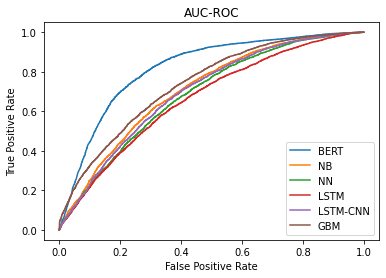

In [ ]:
import matplotlib.pyplot as plt
# plot the roc curve for the model
plt.plot(BERT_fpr, BERT_tpr, label='BERT')
plt.plot(NB_fpr, NB_tpr, label='NB')
plt.plot(NN_fpr, NN_tpr, label='NN')
plt.plot(LSTM_fpr, LSTM_tpr, label='LSTM')
plt.plot(LSTM_CNN_fpr, LSTM_CNN_tpr, label='LSTM-CNN')
# plt.plot(LSTM_CNN_fpr, LSTM_CNN_tpr, label='LSTM_CNN')
plt.plot(GBM_fpr, GBM_tpr, label='GBM')
#plt.plot(fpr_ll, tpr_ll, linestyle='-', label='Logistic Regression')
#pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC')
# show the legend
plt.legend()
# show the plot
plt.show()

[[3589 1411]
 [1019 3981]]


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

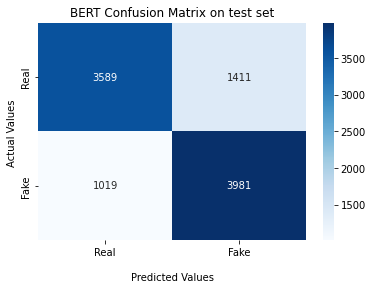

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score,roc_curve,auc,roc_curve,roc_auc_score,f1_score
import seaborn as sns
import matplotlib as plt

cnf_matrix_test = confusion_matrix(BERT.labels , BERT.predictions)
print(cnf_matrix_test)
ax = sns.heatmap(cnf_matrix_test, annot=True,fmt='g', cmap='Blues')

ax.set_title('BERT Confusion Matrix on test set');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])


[[2860 2140]
 [1316 3684]]


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

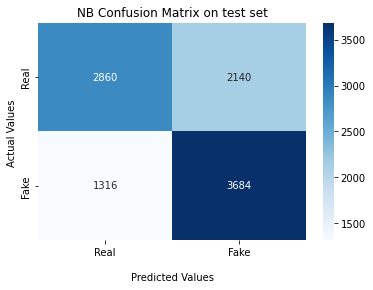

In [ ]:
cnf_matrix_test = confusion_matrix(NB.labels , NB.predictions)
print(cnf_matrix_test)
ax = sns.heatmap(cnf_matrix_test, annot=True,fmt='g', cmap='Blues')

ax.set_title('NB Confusion Matrix on test set');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])